# Tarefa 2 - Regressão Logística 
Feito por Carlos Bravo

DRE: 119136241

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#@title Leitura e limpeza de dados (Tarefa 1)
df = pd.read_csv('../data/cancer.csv')
# Remove "Unnamed: 32" column
df = df.drop('Unnamed: 32', axis=1)
# Remove df outliers in every column except "id" and "diagnosis"
for col in df.drop(['id', 'diagnosis'], axis=1).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]
# Convert "diagnosis" column to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Remove df column "id"
df = df.drop('id', axis=1)
# Normalize data
df_norm = (df.drop(['diagnosis'], axis=1) - df.drop(['diagnosis'], axis=1).mean()) / df.drop(['diagnosis'], axis=1).std()
df = pd.concat([df['diagnosis'], df_norm], axis=1)

## Logistic Regression

In [3]:
# Split df into train and test
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [19]:
# Apply logistic regression using area_worst and concavity_mean
X = train[['area_worst', 'concavity_mean']]
y = train['diagnosis']
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on training set: 0.93


c:\Users\carlo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


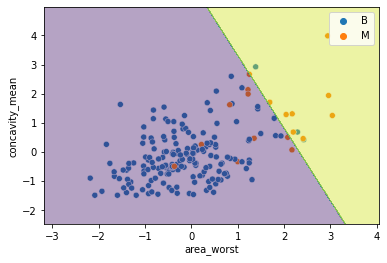

In [20]:
# Plot scatter plot of train data using area_worst and concavity_mean
sns.scatterplot(x='area_worst', y='concavity_mean', hue='diagnosis', data=train)

# Plot decision boundary
x_min, x_max = X['area_worst'].min() - 1, X['area_worst'].max() + 1
y_min, y_max = X['concavity_mean'].min() - 1, X['concavity_mean'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Change diagnosis labels to "M" and "B" in plot
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['B', 'M']
plt.legend(handles, labels)

plt.show()

Precision: 0.73
Recall: 0.44
F1 score: 0.55
Accuracy: 0.93


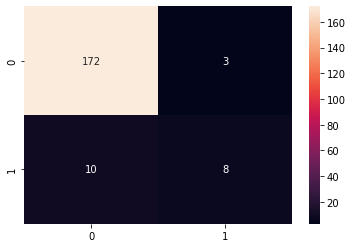

In [21]:
# Plot confusion matrix
cfm = confusion_matrix(y, y_pred)
sns.heatmap(cfm, annot=True, fmt='g')

# Print precision, recall, f1-score and accuracy
print('Precision: {:.2f}'.format(cfm[1, 1] / (cfm[0, 1] + cfm[1, 1])))
print('Recall: {:.2f}'.format(cfm[1, 1] / (cfm[1, 0] + cfm[1, 1])))
print('F1 score: {:.2f}'.format(2 * cfm[1, 1] / (2 * cfm[1, 1] + cfm[0, 1] + cfm[1, 0])))
print('Accuracy: {:.2f}'.format((cfm[0, 0] + cfm[1, 1]) / (cfm[0, 0] + cfm[0, 1] + cfm[1, 0] + cfm[1, 1])))

Precision: 1.00
Recall: 0.25
F1 score: 0.40
Accuracy: 0.96


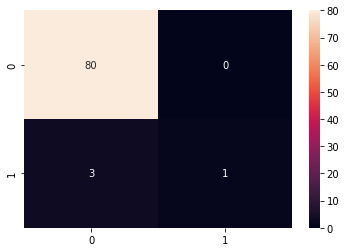

In [23]:
# Plot confunsion matrix for test data
X = test[['area_worst', 'concavity_mean']]
y = test['diagnosis']
y_pred = logreg.predict(X)
cfm = confusion_matrix(y, y_pred)
sns.heatmap(cfm, annot=True, fmt='g')

# Print precision, recall, f1-score and accuracy
print('Precision: {:.2f}'.format(cfm[1, 1] / (cfm[0, 1] + cfm[1, 1])))
print('Recall: {:.2f}'.format(cfm[1, 1] / (cfm[1, 0] + cfm[1, 1])))
print('F1 score: {:.2f}'.format(2 * cfm[1, 1] / (2 * cfm[1, 1] + cfm[0, 1] + cfm[1, 0])))
print('Accuracy: {:.2f}'.format((cfm[0, 0] + cfm[1, 1]) / (cfm[0, 0] + cfm[0, 1] + cfm[1, 0] + cfm[1, 1])))

Usando os dois atributos mais significativos é possível ver que a regressão logística, mesmo obtendo ótimos resultados, não é tão boa assim. Se todo câncer fosse classificado como benigno, o resultado seria bem similar. Vamos utilizar todos os atributos para ver se o resultado melhora.

In [15]:
# Apply logistic regression using all features
X = train.drop(['diagnosis'], axis=1)
y = train['diagnosis']
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on training set: 0.98


Precision: 1.00
Recall: 0.78
F1 score: 0.88
Accuracy: 0.98


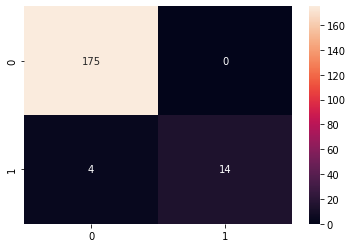

In [16]:
# Plot confusion matrix
cfm = confusion_matrix(y, y_pred)
sns.heatmap(cfm, annot=True, fmt='g')

# Print precision, recall, f1-score and accuracy
print('Precision: {:.2f}'.format(cfm[1, 1] / (cfm[0, 1] + cfm[1, 1])))
print('Recall: {:.2f}'.format(cfm[1, 1] / (cfm[1, 0] + cfm[1, 1])))
print('F1 score: {:.2f}'.format(2 * cfm[1, 1] / (2 * cfm[1, 1] + cfm[0, 1] + cfm[1, 0])))
print('Accuracy: {:.2f}'.format((cfm[0, 0] + cfm[1, 1]) / (cfm[0, 0] + cfm[0, 1] + cfm[1, 0] + cfm[1, 1])))

Precision: 0.75
Recall: 0.75
F1 score: 0.75
Accuracy: 0.98


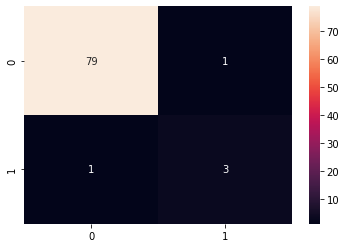

In [17]:
# Plot confunsion matrix for test data
X = test.drop(['diagnosis'], axis=1)
y = test['diagnosis']
y_pred = logreg.predict(X)
cfm = confusion_matrix(y, y_pred)
sns.heatmap(cfm, annot=True, fmt='g')

# Print precision, recall, f1-score and accuracy
print('Precision: {:.2f}'.format(cfm[1, 1] / (cfm[0, 1] + cfm[1, 1])))
print('Recall: {:.2f}'.format(cfm[1, 1] / (cfm[1, 0] + cfm[1, 1])))
print('F1 score: {:.2f}'.format(2 * cfm[1, 1] / (2 * cfm[1, 1] + cfm[0, 1] + cfm[1, 0])))
print('Accuracy: {:.2f}'.format((cfm[0, 0] + cfm[1, 1]) / (cfm[0, 0] + cfm[0, 1] + cfm[1, 0] + cfm[1, 1])))

Em comparação com o resultado anterior, agora teve 1 caso de falso positivo (Equivalente a 1.25% dos casos benignos) e 1 caso de falso negativo (Equivalente a 25% dos casos malignos). Como estamos lidando com um problema de saúde, é melhor ter um falso positivo do que um falso negativo. Por isso, o resultado atual se adequa bem melhor ao problema. 

## Referências
1. GitHub Copilot
0. Documentação SciKit Learn
0. Slides da aula 2 e 4 de Introdução ao Aprendizado de Máquina
0. Tarefa 1 de Introdução ao Aprendizado de Máquina